# Práctica 5
Integrantes:
- Pineda Hernández Francisco
- Ramirez Aguilar Rodrigo Vidal

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS

In [2]:
import numpy as np

X_list = []

for t1 in range(0, 21):
    for t2 in range(0, 21):
        v = ((t1*0.1)-1) * ((t2*0.1)-1)
        X_list.append([v, t1*0.1, t2*0.1])

X = np.array(X_list)
X

array([[1. , 0. , 0. ],
       [0.9, 0. , 0.1],
       [0.8, 0. , 0.2],
       ...,
       [0.8, 2. , 1.8],
       [0.9, 2. , 1.9],
       [1. , 2. , 2. ]], shape=(441, 3))

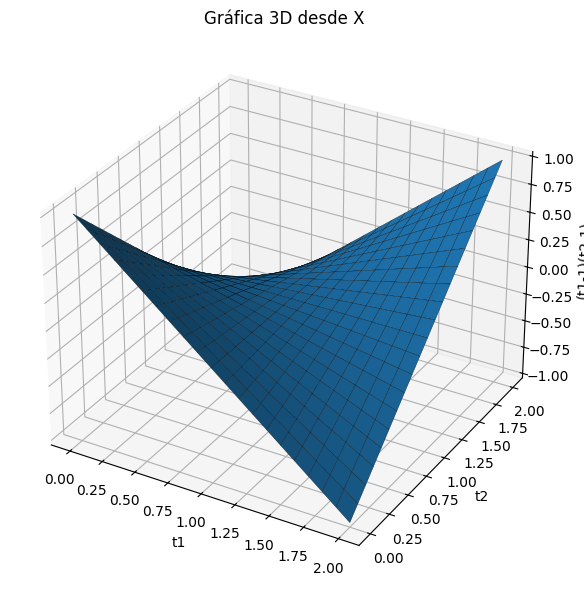

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

def plot_from_X(X, kind='surface', elev=30, azim=-60):
    X = np.asarray(X)
    if X.ndim != 2 or X.shape[1] != 3:
        raise ValueError("X debe ser un array de forma (n,3) con columnas [z, t1, t2].")

    z = X[:, 0]
    t1 = X[:, 1]
    t2 = X[:, 2]

    t1u = np.unique(t1)
    t2u = np.unique(t2)

    z_dict = {(float(a), float(b)): float(c) for a, b, c in zip(t1, t2, z)}

    T1, T2 = np.meshgrid(t1u, t2u)  
    Z = np.zeros_like(T1, dtype=float)

    for i, tt2 in enumerate(t2u):
        for j, tt1 in enumerate(t1u):
            Z[i, j] = z_dict.get((float(tt1), float(tt2)), np.nan)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)

    if kind == 'surface':
        # surface plot
        surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, edgecolor='k', linewidth=0.2)
    elif kind == 'scatter':
        ax.scatter(T1.ravel(), T2.ravel(), Z.ravel(), s=20)
    else:
        raise ValueError("kind debe ser 'surface' o 'scatter'.")

    ax.set_xlabel('t1')
    ax.set_ylabel('t2')
    ax.set_zlabel('(t1-1)(t2-1)')
    ax.set_title('Gráfica 3D desde X')
    plt.tight_layout()
    plt.show()

plot_from_X(X, kind='surface')


In [4]:
media_X = np.mean(X, axis=0)        
#autovalores, autovectores = np.linalg.eig(X)
X_media = X - media_X

In [5]:
X_media_T = X_media.T

In [6]:
X_cuadrada = np.dot(X_media, X_media_T)

In [7]:
n = X.shape[0]
autovalores, autovectores = np.linalg.eigh(X_cuadrada)

In [8]:
com_x = np.argsort(autovalores)[::-1]
autovalores = autovalores[com_x]
autovectores = autovectores[:, com_x]

print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

Autovalores: [ 1.61700000e+02  1.61700000e+02  5.92900000e+01  5.61552591e-14
  5.52739430e-14  4.10278761e-14  3.64063261e-14  3.23809050e-14
  3.08464527e-14  3.02634697e-14  2.36461674e-14  2.25701416e-14
  1.81018105e-14  1.73065686e-14  1.10190883e-14  9.90327638e-15
  9.78434337e-15  8.69373060e-15  8.27486267e-15  8.02280297e-15
  7.84410949e-15  6.74291706e-15  6.28457263e-15  5.81883547e-15
  5.56895590e-15  5.39827345e-15  4.93040464e-15  4.80025483e-15
  3.96419561e-15  3.89982634e-15  3.88688555e-15  3.78323345e-15
  3.62550332e-15  3.57032604e-15  3.47032829e-15  3.46428913e-15
  3.13921616e-15  3.13779956e-15  3.10757713e-15  3.09859668e-15
  3.07987077e-15  3.00102497e-15  2.97373767e-15  2.83943592e-15
  2.80877401e-15  2.78095024e-15  2.70967839e-15  2.69806096e-15
  2.61323268e-15  2.59295523e-15  2.56173359e-15  2.52323481e-15
  2.47979905e-15  2.40454267e-15  2.39049107e-15  2.34589630e-15
  2.33803661e-15  2.33385680e-15  2.23606251e-15  2.20272402e-15
  2.17500917

In [9]:
autovalores.shape

(441,)

In [10]:
Lambda = np.array([[np.sqrt(autovalores[0]), 0], [0, np.sqrt(autovalores[1])]])

In [11]:
X2 = X[:, 1:]          
Xm = X2.mean(axis=0)
xn = X2 - Xm           
Xv = xn @ xn.T         

val, vec = np.linalg.eigh(Xv)
indices = np.argsort(val)[::-1]
vecs = vec[:, indices]

Q = vecs[:, :2]

In [12]:
Y = Q @ Lambda
Y

array([[ 1.41421356e+00,  9.06742759e-18],
       [ 1.34350288e+00,  7.07106781e-02],
       [ 1.27279221e+00,  1.41421356e-01],
       [ 1.20208153e+00,  2.12132034e-01],
       [ 1.13137085e+00,  2.82842712e-01],
       [ 1.06066017e+00,  3.53553391e-01],
       [ 9.89949494e-01,  4.24264069e-01],
       [ 9.19238816e-01,  4.94974747e-01],
       [ 8.48528137e-01,  5.65685425e-01],
       [ 7.77817459e-01,  6.36396103e-01],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 6.36396103e-01,  7.77817459e-01],
       [ 5.65685425e-01,  8.48528137e-01],
       [ 4.94974747e-01,  9.19238816e-01],
       [ 4.24264069e-01,  9.89949494e-01],
       [ 3.53553391e-01,  1.06066017e+00],
       [ 2.82842712e-01,  1.13137085e+00],
       [ 2.12132034e-01,  1.20208153e+00],
       [ 1.41421356e-01,  1.27279221e+00],
       [ 7.07106781e-02,  1.34350288e+00],
       [ 3.32456398e-16,  1.41421356e+00],
       [ 1.34350288e+00, -7.07106781e-02],
       [ 1.27279221e+00,  1.11767253e-17],
       [ 1.

In [13]:
print("Shape de Y:", Y.shape)
print("Primeras filas de Y:\n", Y[:5])

Shape de Y: (441, 2)
Primeras filas de Y:
 [[1.41421356e+00 9.06742759e-18]
 [1.34350288e+00 7.07106781e-02]
 [1.27279221e+00 1.41421356e-01]
 [1.20208153e+00 2.12132034e-01]
 [1.13137085e+00 2.82842712e-01]]


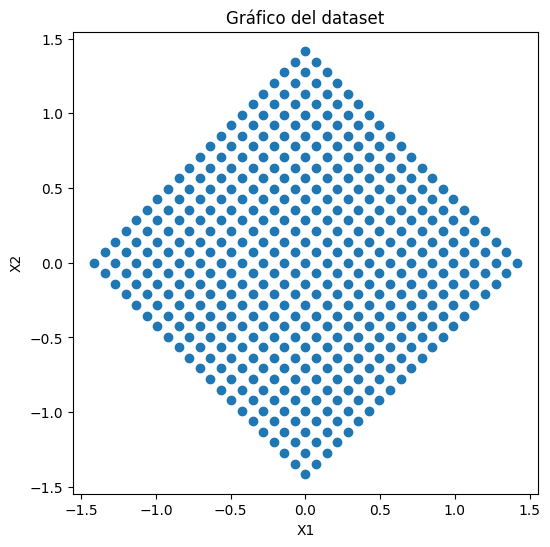

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X):
    """
    Grafica un conjunto de puntos 2D dado en un array Nx2.
    """
    X = np.array(X)

    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1])  
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gráfico del dataset")
    plt.axis("equal")  
    plt.show()

# Ejemplo de uso:
plot_dataset(Y)


In [15]:
# Aplicar MDS al dataset X
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

print("Shape de X_mds:", X_mds.shape)
print("Primeras filas de X_mds:\n", X_mds[:5])
print("Stress (error de reconstrucción):", mds.stress_)

/home/pineda/GitHub/ESCOM_data-analysis/venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Shape de X_mds: (441, 2)
Primeras filas de X_mds:
 [[-1.65600941 -0.55318656]
 [-1.52945578 -0.56666483]
 [-1.37063068 -0.65823618]
 [-1.26897818 -0.62718771]
 [-1.14256622 -0.65585826]]
Stress (error de reconstrucción): 704.242998970948


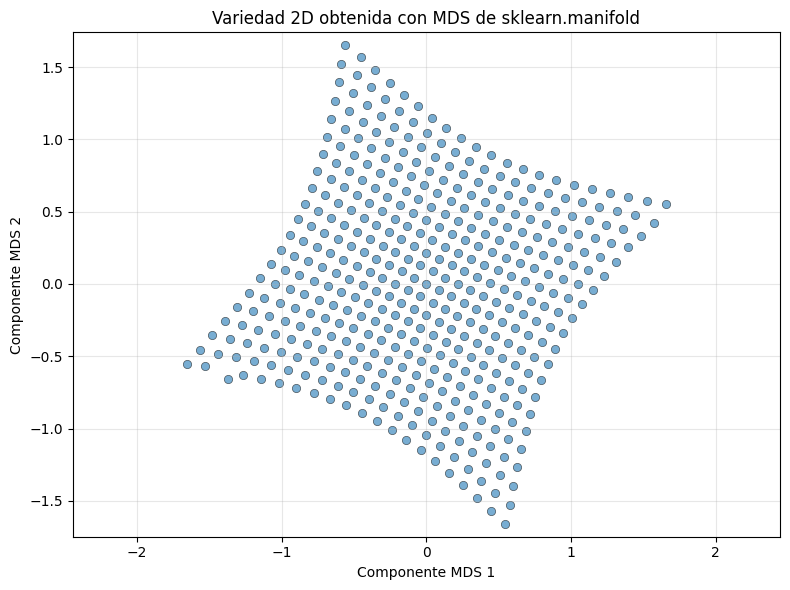

In [16]:
# Graficar el resultado de MDS
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel("Componente MDS 1")
plt.ylabel("Componente MDS 2")
plt.title("Variedad 2D obtenida con MDS de sklearn.manifold")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.tight_layout()
plt.show()

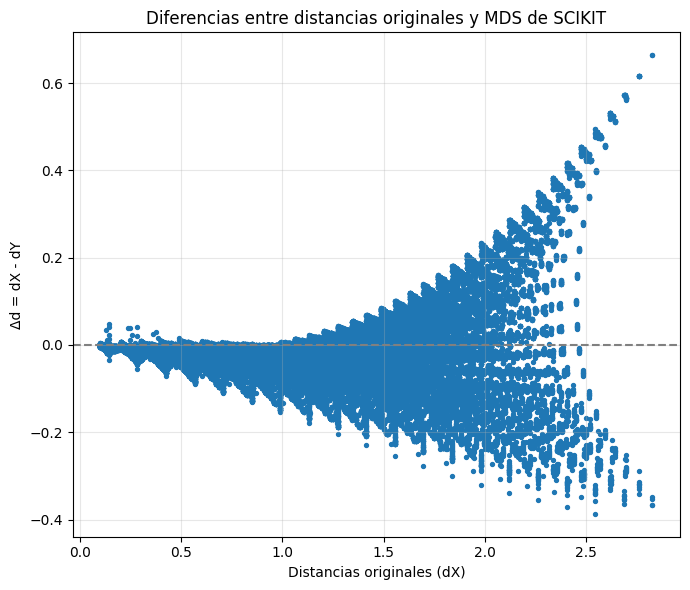

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

dX = pairwise_distances(X)

dY = pairwise_distances(X_mds)

Delta = dY - dX

mask = np.triu_indices_from(dX, k=1)
dX_flat = dX[mask]
dY_flat = dY[mask]
Delta_flat = Delta[mask]

plt.figure(figsize=(7, 6))
plt.scatter(dX_flat, Delta_flat, s=8)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Distancias originales (dX)")
plt.ylabel("Δd = dX - dY")
plt.title("Diferencias entre distancias originales y MDS de SCIKIT")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


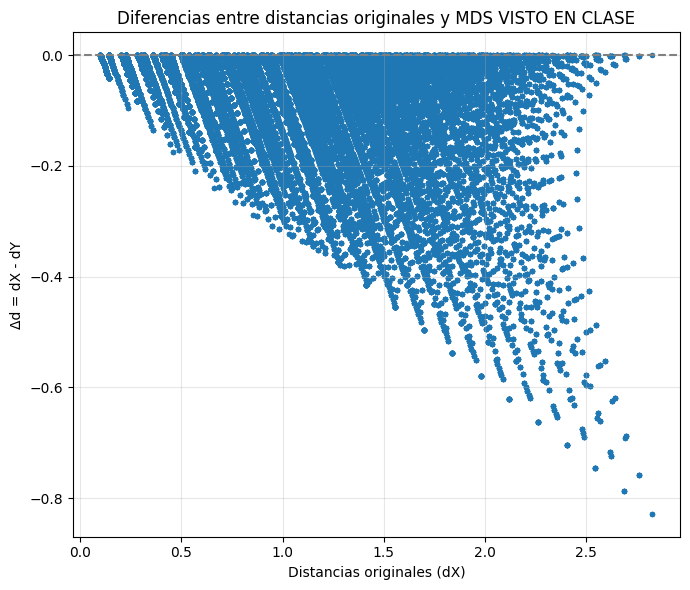

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

dX = pairwise_distances(X)

dY = pairwise_distances(Y)

Delta = dY - dX

mask = np.triu_indices_from(dX, k=1)
dX_flat = dX[mask]
dY_flat = dY[mask]
Delta_flat = Delta[mask]

plt.figure(figsize=(7, 6))
plt.scatter(dX_flat, Delta_flat, s=8)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Distancias originales (dX)")
plt.ylabel("Δd = dX - dY")
plt.title("Diferencias entre distancias originales y MDS VISTO EN CLASE")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
